## Persamaan Gelombang 1D
Persamaan gelombang 1 dimensi dirumuskan menurut
\begin{eqnarray}
\frac{\partial^2u}{\partial t^2}=c^2 \frac{\partial^2u}{\partial x^2} \tag{1}
\end{eqnarray}
dengan $u$ merupakan posisi yang bergantung pada posisi lain $x$ dan waktu $t$

Kasus-kasus yang terkait dengan gelombang memiliki nilai awal dan syarat batas
##### Nilai awal
\begin{eqnarray}
u(x,0)=I(x)\\
\frac{\partial}{\partial t}u(x,0)=f(t)
\end{eqnarray}
##### Syarat batas
\begin{eqnarray}
u(0,t)=0\\
u(L,t)=0
\end{eqnarray}

#### Finite Diference
Diskritisasi Persamaan 1 dapat diuraikan menjadi
\begin{eqnarray}
u_{tt}=\frac{u^{n+1}_j-2u^n_j+u^{n-1}_j}{h_t^2}\\
u_{x}=\frac{u^{n}_{j+1}-2u^n_j+u^{n}_{j-1}}{h_x^2}
\end{eqnarray}
sehingga
\begin{eqnarray}
\frac{u^{n+1}_j-2u^n_j+u^{n-1}_j}{h_t^2}=c^2
\frac{u^{n}_{j+1}-2u^n_j+u^{n}_{j-1}}{h_x^2}
\end{eqnarray}

Suku yang dicari adalah $u^{n+1}_j$ yang diuraikan menurut
\begin{eqnarray}
u^{n+1}_j=s\left(u^n_{j+1}+u^{n}_{j-1}\right)+2(1-s)u^n_j-u^{n-1}_j \tag{2}
\end{eqnarray}
dengan $s=c^2\frac{h_t^2}{h_x^2}$.
<center><img src="gridwave.png" align="center"  width="400" /></center>

Berikutnya perlu untuk membuat diskritisasi nilai awal
\begin{eqnarray}
u(x,0)=I(x) \rightarrow u^0_j&=&I(x) \tag{3}\\
\frac{\partial}{\partial t} u(x,0)=0 \rightarrow \frac{u^1_j-u^{-1}_j}{2h_t}&=&0 \\
u^1_j&=&u^{-1}_j \tag{4}
\end{eqnarray}

Substitusi persamaan (4) ke persamaan (1) diperoleh
\begin{eqnarray}
u^1_j=\frac{s}{2}(u^0_{j+1}+u^0_{j-1})+(1-s)u_j^0 \tag{5}
\end{eqnarray}

##### Contoh Kasus
Sebuah senar dengan panjang $l$ yang dikencangkan pada ujung-ujungnya kemudian bagiang tengahnya ditarik setinggi $h$ lalu dilepaskan. Bagaimanakah fungsi gelombang yaang terjadi?
<center><img src="senar.png" align="center"  width="500" /></center>

##### Nilai awal
Berdasarkan gambar fungsi awal senar adalah
\begin{eqnarray}
u(x,0)=I(x)=\begin{cases}
u = \frac{2h}{l}x &&\quad 0<x<l/2\\ 
u= 2h(1-\frac{x}{l})&& \quad l/2<x<l
\end{cases}
\end{eqnarray}
##### Syarat batas
\begin{eqnarray}
u(0,t)=0,\qquad u(0,l)=0
\end{eqnarray}

In [1]:
from numpy import *
from matplotlib.pyplot import *
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d

l = 1
T_m = 2
Nx =100
Nt=400
c = 1
h=0.1
x, hx = linspace(0, l, Nx, retstep=True) 
t, ht = linspace(0, T_m, Nt, retstep=True)
s=(c*ht/hx)**2

In [2]:
U = zeros((len(x),len(t)))

#syarat batas
U[0,:] = 0
U[-1,:]= 0

for i in range(Nx):
    if i < Nx/2:
        U[i,0] = 2*h*hx*i/l
    else:
        U[i,0] = 2*h*(1-hx*i/l)

In [3]:
#Perhitungan step tambahan persamaan 5
for j in range(1, len(x)-1):
    U[j,1]=s/2*(U[j+1,0]+U[j-1,0])+(1-s)*U[j,0]

In [4]:
for n in range(1, len(t)-1):
    for j in range(1, len(x)-1):
        U[j,n+1]=s*(U[j+1,n]+U[j-1,n])+2*(1-s)*U[j,n]-U[j,n-1]

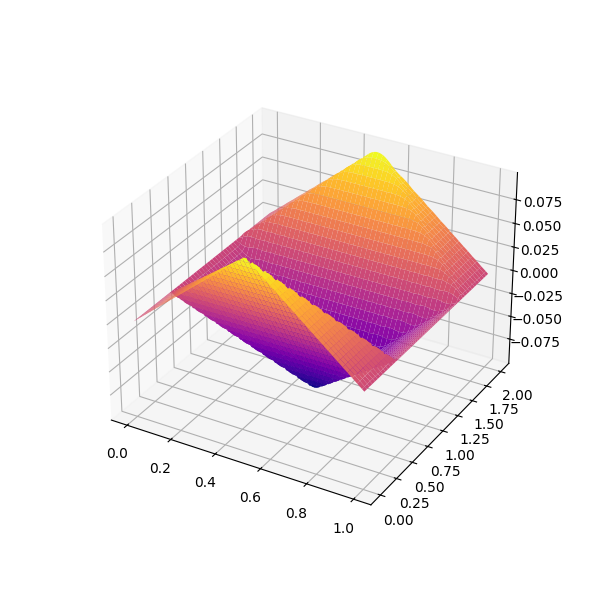

In [22]:
%matplotlib widget
    
X,T =meshgrid(x,t)
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, T, U.T,cmap='plasma')

##### Memilih Colormap
https://matplotlib.org/stable/users/explain/colors/colormaps.html

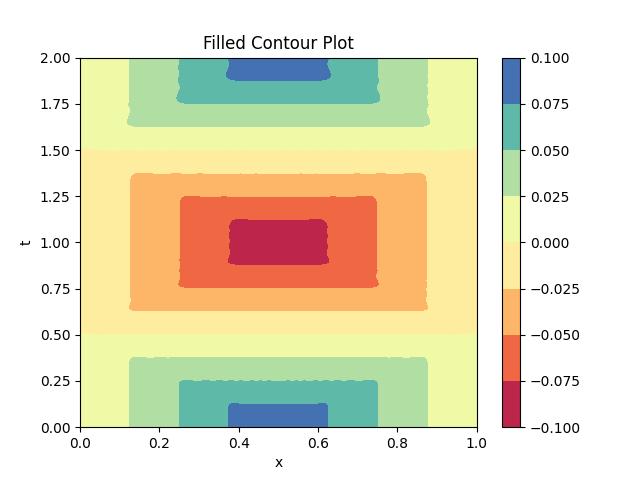

In [24]:
fig, ax = subplots(1, 1) 
  
# plots filled contour plot 
cp = ax.contourf(X, T, U.T, cmap='Spectral') 
  
ax.set_title('Filled Contour Plot') 
ax.set_xlabel('x') 
ax.set_ylabel('t')
fig.colorbar(cp)